In [1]:
__file__ = 'erosion_and_dilation.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP7_lib")

import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
with open("Results/center.txt") as tf:
    data = np.loadtxt(tf,delimiter="\t",skiprows=1,dtype="str")

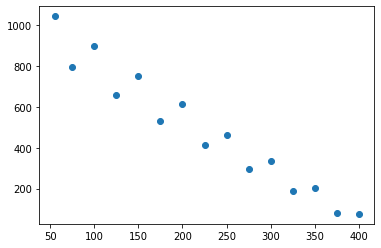

In [9]:
data = np.array(data)
datanew=[[],[]]
for i in data[:,7]:
    datanew[1].append(float(i))
for i in data[:,0]:
    datanew[0].append(int(i.split('_')[0]))
plt.scatter(datanew[0],datanew[1])

In [10]:
print(datanew)

[[100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 55, 75], [896.3554297171084, 658.4367139908608, 750.5371897192379, 531.9451374210361, 612.2410949263237, 413.96759251370185, 464.1175338738538, 298.38042148018525, 332.85378299910457, 190.02996086172277, 203.80149808690877, 80.90404113740982, 76.19901129171528, 1043.9299988780633, 796.1621222407376]]


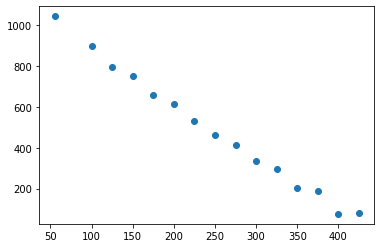

In [13]:
x = [100, 175, 150, 225, 200, 275, 250, 325, 300, 375, 350, 425, 400, 55, 125]


plt.scatter(x,datanew[1])